# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [13]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [14]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

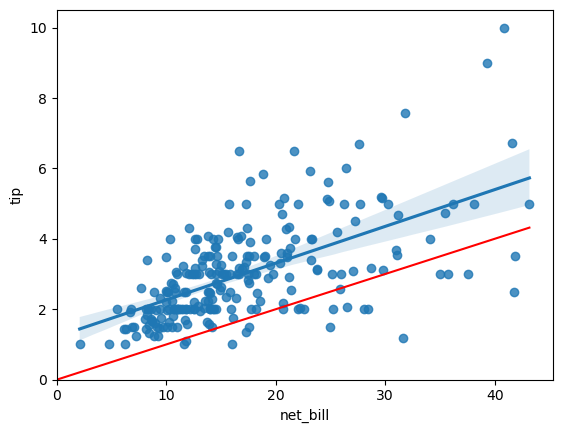

In [15]:

sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.505398619388979)

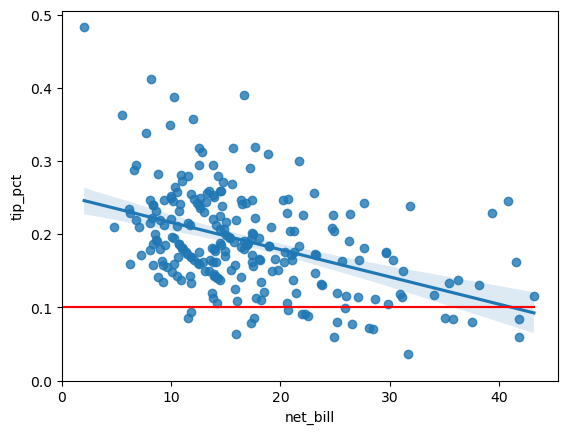

In [16]:
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = np.full_like(x, 0.1)  # vetor constante com valor 0.1
plt.plot(x, y, '-r', label='linha dos 10%')

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)



### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Podemos ver que não existe mais a relação crescente, a gorjeta sempre será 10% independente do valor da conta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [17]:
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()

pred = reg.fittedvalues

pred.head()

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

In [18]:
tips['tip'] = tips['tip_pct'] * tips['net_bill']

print(tips[['net_bill', 'tip_pct', 'tip']].head())

   net_bill   tip_pct   tip
0     15.98  0.063204  1.01
1      8.68  0.191244  1.66
2     17.51  0.199886  3.50
3     20.37  0.162494  3.31
4     20.98  0.172069  3.61


In [19]:
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()

print(f"R² do modelo tip ~ net_bill: {reg_tip.rsquared:.4f}")

R² do modelo tip ~ net_bill: 0.3325


In [20]:
reg_tip1 = smf.ols('tip_pct ~ net_bill', data=tips).fit()

print(f"R² do modelo tip_pct ~ net_bill: {reg_tip1.rsquared:.4f}")

R² do modelo tip_pct ~ net_bill: 0.0913


Podemos observar que o primeiro modelo é muito mais eficiente devido a se R2.